In [1]:
import pandas as pd
import requests
import bs4
import requests
import time

In [2]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import DateFormatter

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("it-jobs.csv")
df.sample(5)
df['published'] = pd.to_datetime(df["published"], errors='coerce', format='%Y-%m-%d')

In [5]:
df_res = df[df.published>='2020-03-02'].sort_values('published')
df_res.set_index('published', drop=True, inplace=True)
date_form = DateFormatter("%m-%d")
df_res = df_res.resample('7D').size().to_frame()
df_res.index = df_res.index.strftime('%B-%d')
df_res.columns = ['qnty']

In [6]:
df_res

,qnty
published,
March-02,40
March-09,89
March-16,229
March-23,168
March-30,303
April-06,329
April-13,664
April-20,1135


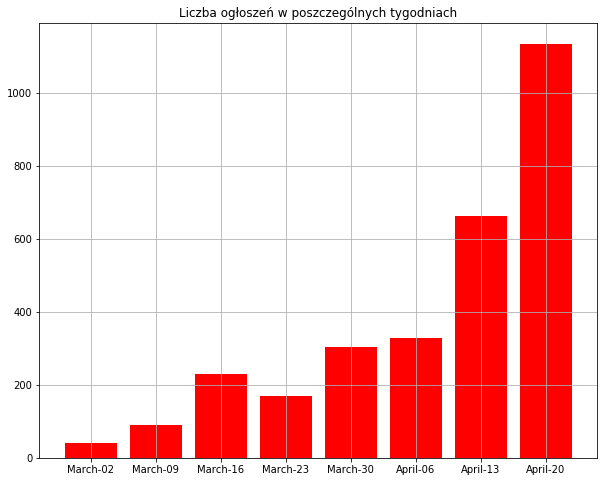

In [17]:
plt.figure(figsize=(10,8))
plt.bar(df_res.index, df_res['qnty'], color='red', width=0.8)
plt.title('Liczba ogłoszeń w poszczególnych tygodniach')
plt.grid()

# Rekrutujący (firmy/firmy HR)

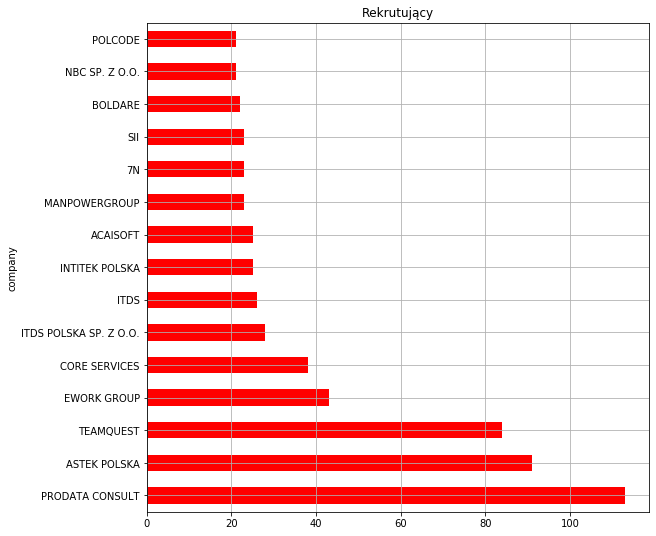

In [8]:
df.company.replace("-",'BRAK DANYCH', inplace=True)
df.groupby('company').size().\
        sort_values(ascending=False).head(15).plot(kind='barh', grid=True, figsize=(9,9), color='red', title='Rekrutujący')

# Ogłoszenie wg. technologii

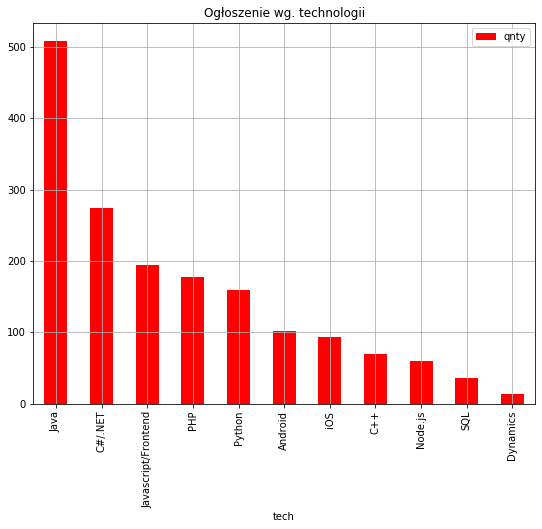

In [9]:
techs = []
techs.append(('C++',))
techs.append(('Dynamics',))
techs.append(('Python',))
techs.append(('PHP',))
techs.append(('Node.js',))
techs.append(('C#/.NET',))
techs.append(('Javascript/Frontend','Java'))
techs.append(('Java',))
techs.append(('SQL',))
techs.append(('Android',))
techs.append(('iOS',))

results = []

def calc_tech(line):
    line = line.replace("+","\\+")
    return df[df.title.str.contains(line, case=False)].shape
    
for tech in techs:
    lines = tech[0].split("/")
    sum_ = 0
    for line in lines:
        line = line.strip()
        x = calc_tech(line)
        sum_ += x[0]
    if len(tech)>1:
        calc_tech(tech[1])
        
    #print(tech[0], x[0], sep="|")
    results.append({ "tech":tech[0], "qnty":x[0] })

df_tech = pd.DataFrame(results).sort_values('qnty', ascending=False)
df_tech.set_index('tech').plot(kind='bar', figsize=(9,7), color='red', grid=True, title='Ogłoszenie wg. technologii')

# Rozkład zarobków

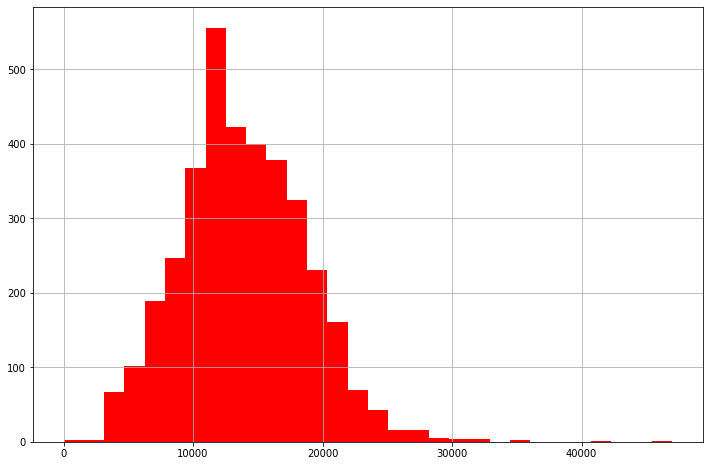

In [16]:
df["salary_avg"] = (df.salary_from+df.salary_to)/2
df["salary_avg"].hist(bins=30, figsize=(12,8), color='red')

# Mediana i średnia

In [11]:
df["salary_avg"].mean(), df["salary_avg"].median()

(13895.852949321517, 13600.0)

# Ogłoszenia wg. miast

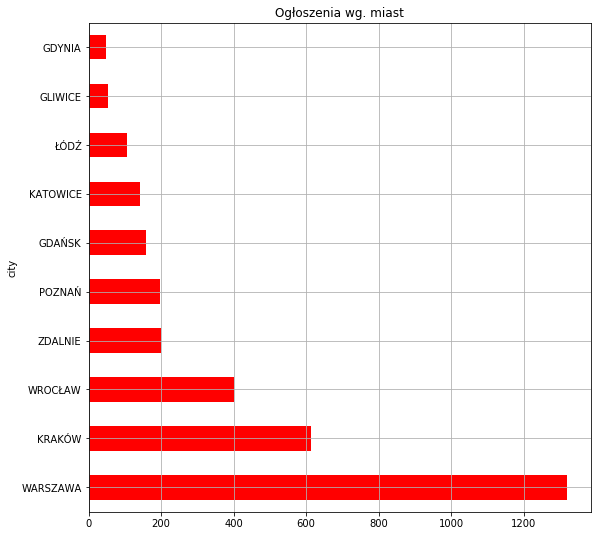

In [12]:
df.groupby('city').size().\
        sort_values(ascending=False).head(10).plot(kind='barh', grid=True, figsize=(9,9), color='red', title='Ogłoszenia wg. miast')

# Podział wg. kryterium - tylko praca zdalna

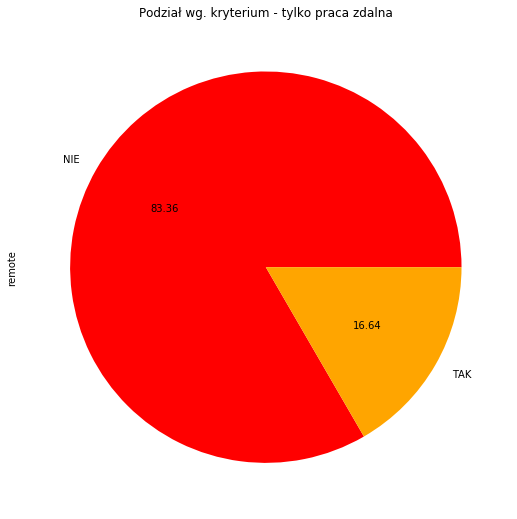

In [13]:
df.remote.replace([False,True],['NIE','TAK']).\
        value_counts().plot.pie(autopct='%.2f', figsize=(9,9), colors=['red','orange'], title='Podział wg. kryterium - tylko praca zdalna')